In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = '/Users/luyandamahlangu/Desktop/Projects/covid_worldwide.csv'
df = pd.read_csv(dataset)
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [7]:
#DATA CLEANING

# Remove unnecessary columns
df = df.drop(columns=["Serial Number"])

# Replace commas with empty strings and convert to numeric values
cols_to_clean = ["Total Cases", "Total Deaths", "Total Recovered", "Active Cases", "Total Test", "Population"]
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(",", "").replace("N/A", np.nan).astype(float)

# Handle missing values by filling with the median (better than mean for skewed distributions)
df.fillna(df.median(numeric_only=True), inplace=True)

# Create new calculated columns
df["Fatality Rate (%)"] = (df["Total Deaths"] / df["Total Cases"]) * 100
df["Recovery Rate (%)"] = (df["Total Recovered"] / df["Total Cases"]) * 100

# Display cleaned dataset summary
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            231 non-null    object 
 1   Total Cases        231 non-null    float64
 2   Total Deaths       231 non-null    float64
 3   Total Recovered    231 non-null    float64
 4   Active Cases       231 non-null    float64
 5   Total Test         231 non-null    float64
 6   Population         231 non-null    float64
 7   Fatality Rate (%)  231 non-null    float64
 8   Recovery Rate (%)  231 non-null    float64
dtypes: float64(8), object(1)
memory usage: 16.4+ KB


(None,
    Country  Total Cases  Total Deaths  Total Recovered  Active Cases  \
 0      USA  104196861.0     1132935.0      101322779.0     1741147.0   
 1    India   44682784.0      530740.0       44150289.0        1755.0   
 2   France   39524311.0      164233.0       39264546.0       95532.0   
 3  Germany   37779833.0      165711.0       37398100.0      216022.0   
 4   Brazil   36824580.0      697074.0       35919372.0      208134.0   
 
      Total Test    Population  Fatality Rate (%)  Recovery Rate (%)  
 0  1.159833e+09  3.348053e+08           1.087302          97.241681  
 1  9.152658e+08  1.406632e+09           1.187795          98.808277  
 2  2.714902e+08  6.558452e+07           0.415524          99.342772  
 3  1.223324e+08  8.388360e+07           0.438623          98.989585  
 4  6.377617e+07  2.153536e+08           1.892958          97.541838  )

In [10]:
#EXPLORATORY DATA ANALYSIS

# Top 10 countries with highest total cases
top_countries = df.nlargest(10, "Total Cases")
top_countries

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,Fatality Rate (%),Recovery Rate (%)
0,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08,1.087302,97.241681
1,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09,1.187795,98.808277
2,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07,0.415524,99.342772
3,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07,0.438623,98.989585
4,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08,1.892958,97.541838
5,Japan,32588442.0,68399.0,21567425.0,10952618.0,9.214464e+07,1.255848e+08,0.209887,66.181209
6,S. Korea,30197066.0,33486.0,29740877.0,422703.0,1.580406e+07,5.132990e+07,0.110892,98.489294
7,Italy,25453789.0,186833.0,25014986.0,251970.0,2.654782e+08,6.026277e+07,0.734009,98.276080
8,UK,24274361.0,204171.0,24020088.0,50102.0,5.225265e+08,6.849791e+07,0.841097,98.952504
9,Russia,21958696.0,395108.0,21356008.0,207580.0,2.734000e+08,1.458059e+08,1.799324,97.255356


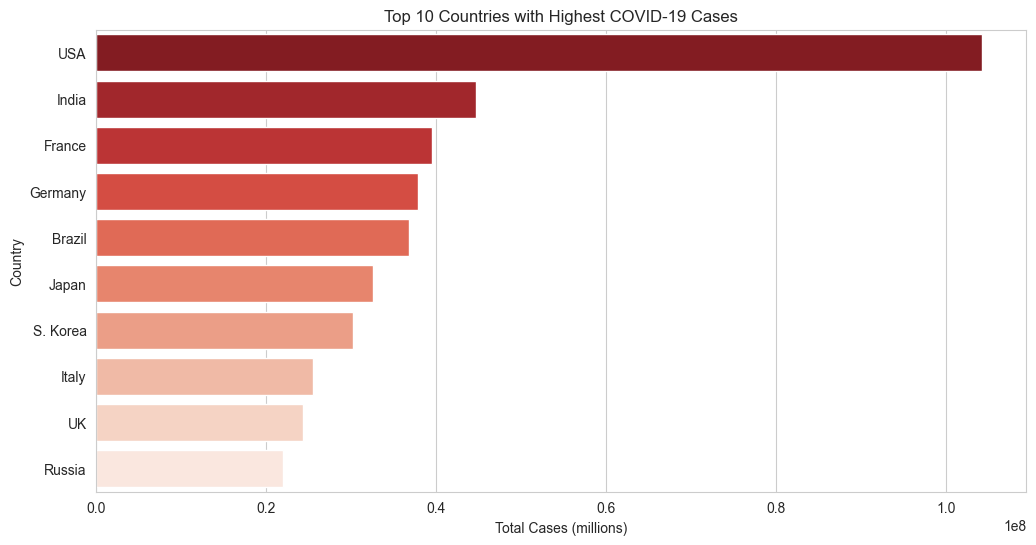

In [14]:
# Bar chart of total cases for top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x="Total Cases", y="Country", hue = 'Country', data=top_countries, palette="Reds_r", legend = False)
plt.xlabel("Total Cases (millions)")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest COVID-19 Cases")
plt.show()

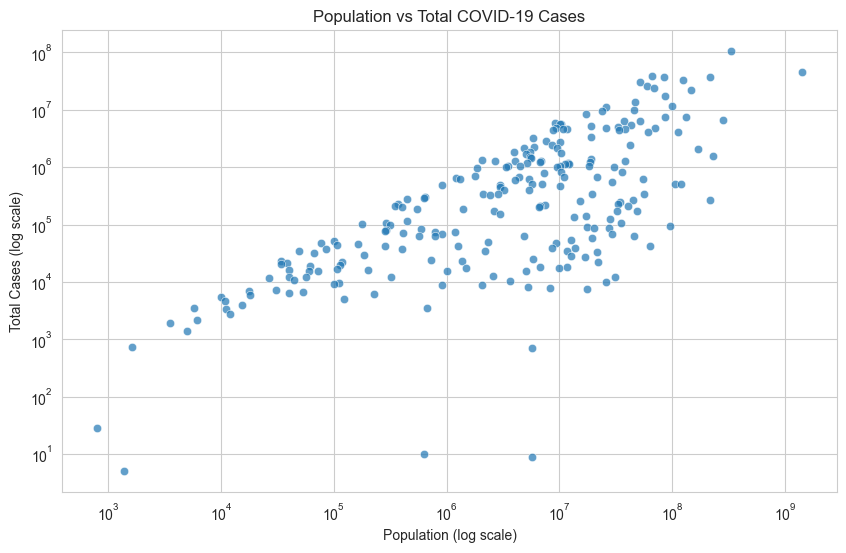

In [12]:

# Scatter plot: Population vs Total Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Population"], y=df["Total Cases"], alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Population (log scale)")
plt.ylabel("Total Cases (log scale)")
plt.title("Population vs Total COVID-19 Cases")
plt.show()

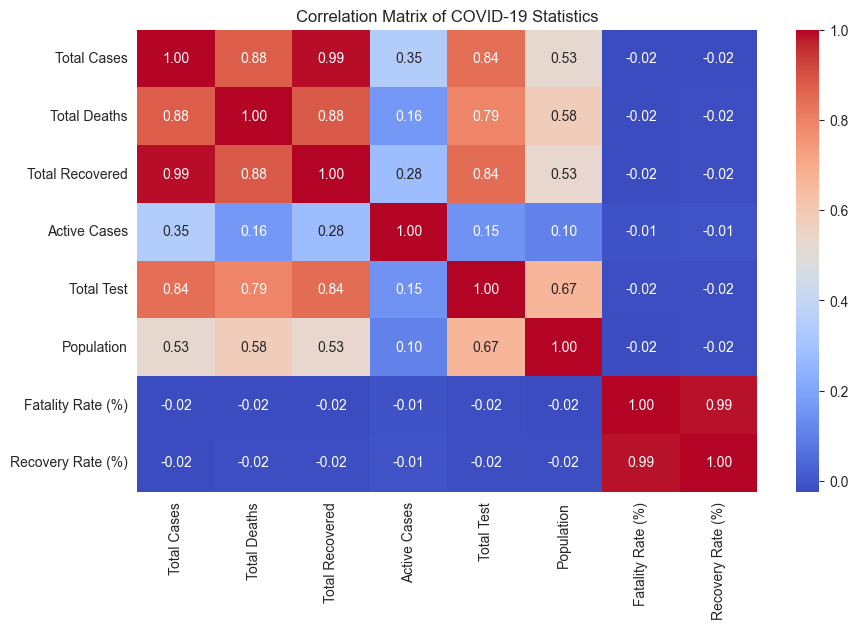

In [15]:
#Select only numeric columns
df = df.select_dtypes(include =['number'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of COVID-19 Statistics")
plt.show()